<a href="https://colab.research.google.com/github/jesusdme/vacio/blob/main/multiclass_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data/multiclass_dataset.csv')
dataset = dataset.sample(frac=1)
dataset.head(5)

,feature_1,feature_2,label
652,9.830032,5.080768,1.0
14,-10.314970,4.616171,0.0
379,-14.395589,-7.868212,2.0
846,13.242577,7.267838,1.0
889,0.233197,12.395064,0.0


## Plotting Data

In [ ]:
class_share = pd.Series(100 * dataset["label"].value_counts(normalize=True)).sort_index()
print('Class share\n')
for i in range(0, 3):
    print(f'Class {class_share.index[i]}: {class_share.iloc[i]:.2f} %')

Class share

Class 0.0: 33.33 %
Class 1.0: 55.56 %
Class 2.0: 11.11 %


In [ ]:
x_data = dataset.iloc[:, :-1]
y_data = dataset.iloc[:, -1]

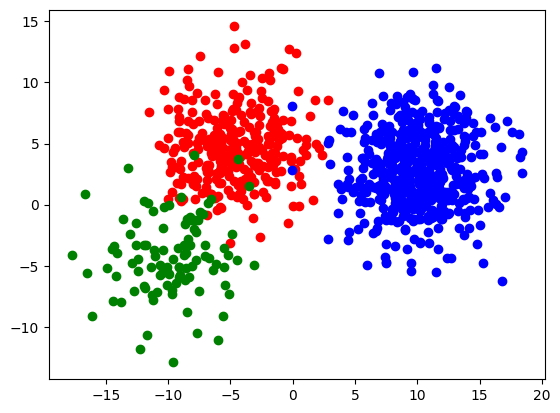

In [ ]:
import matplotlib.pyplot as plt

for label, color in {0.0: "red", 1.0: "blue", 2.0: "green", 3.0: "yellow"}.items():
    data = dataset[dataset["label"] == label]
    plt.scatter(data.iloc[:, 0].values, data.iloc[:, 1].values, color=color)
plt.show()

In [ ]:
## Splitting Data

In [ ]:
train_size = round(.7 * dataset.shape[0])
x_train = x_data.iloc[:train_size]
y_train = y_data.iloc[:train_size]
x_test = x_data.iloc[train_size:]
y_test = y_data.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train_scaled, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 92   0   0]
 [  3 145   0]
 [  3   0  27]]


0.9777777777777777

In [ ]:
step_size = 0.2
x_min, x_max = x_data.iloc[:, 0].min() - 1, x_data.iloc[:, 0].max() + 1
y_min, y_max = x_data.iloc[:, 1].min() - 1, x_data.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))
z = classifier.predict(sc.transform(np.array([xx.ravel(), yy.ravel()]).T))


/home/rd_crow_shadow/.cache/pypoetry/virtualenvs/ia-1BN5Yi8D-py3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0
1
2


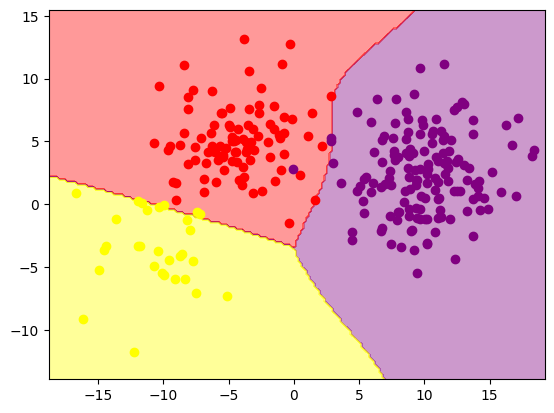

In [ ]:
from matplotlib.colors import ListedColormap

z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=ListedColormap(('red', 'purple', "yellow")), alpha=0.4)
for i, color in enumerate(['red', 'purple', 'yellow']):
    print(i)
    plt.scatter(x_test[(y_test == i).values].iloc[:, 0], x_test[(y_test == i).values].iloc[:, 1], c=color)